In [1]:

## read in the swed file 
with open('310816_swd.txt', 'r') as myfile:
        content = myfile.readlines()
## Find the length 
house_hold_id=[]
individual_id=[]
channel_code=[]
start_time=[]
end_time=[]
tv_set=[]
audience_type=[]


for i in content:

    house_hold_id.append(i[0:8])
    individual_id.append(i[8:10])
    channel_code.append(i[10:14])
    start_time.append(i[14:20])
    end_time.append(i[20:26])
    tv_set.append(i[26])
    audience_type.append(i[27])
    
    

## Convert into pandas DF
import pandas as pd
swd_data = pd.DataFrame(
    {'House_hold_id': house_hold_id,
     'individual_id': individual_id,
     'channel_code': channel_code,
     'start_time':start_time,
     'end_time':end_time,
     'tv_set':tv_set,
     'audience_type':audience_type
    })

swd_data.head()



,House_hold_id,individual_id,channel_code,start_time,end_time,tv_set,audience_type
0,26405151,01,0001,124100,130459,9,1
1,26405151,01,0001,201400,215259,9,1
2,26405151,01,0042,082000,084359,9,1
3,26405151,01,0042,103700,103759,9,1
4,26405151,01,0202,081800,081959,9,1


In [2]:

bytes_read = open("310816_dem.txt", "rb").read()

In [3]:
m=[]
for i in bytes_read:
    m.append(str(chr(i)))
l=''.join(m)  
dem=l.splitlines()

In [4]:
house_hold_id_1=[]
individual_id_1=[]
weight=[]
viewer_type=[]
sampletype=[]
demographic_inf0=[]


for i in dem:
    house_hold_id_1.append(i[0:8])
    individual_id_1.append(i[8:10])
    weight.append(i[10:18])
    viewer_type.append(i[18])
    sampletype.append(i[19])
    demographic_inf0.append(i[19:(len(i)-1)])
    

In [5]:
## Clean up deomgraphic info :
demographic_inf0
## fidn the byte vlaue and subtract 48 and recast back :
dem_info=[]
for i in demographic_inf0:
    s=''
    for j in i:
        s+=str(ord(j)-48)
    dem_info.append(s)


In [6]:
dem_data=pd.DataFrame(
    {'House_hold_id': house_hold_id_1,
     'individual_id': individual_id_1,
     'weight':weight,
     'viewer_type':viewer_type,
     'sample_type':sampletype,
     'demographic_info':dem_info
    })

dem_data.head()

,House_hold_id,individual_id,weight,viewer_type,sample_type,demographic_info
0,26405151,01,005.5611,1,1,126874512212221221111121226
1,26405151,02,006.2414,1,1,116874512212222221111121226
2,26405338,02,005.5611,1,1,12616357142221221121121236
3,26405338,03,018.6235,1,1,11293547142222221121121214
4,26405431,01,005.5611,1,1,126875513212222222141121236


In [7]:
max(dem_data.demographic_info.apply(len))

27

In [24]:
dem_data.weight.sort_values(ascending=False).head()

1001    2.111112e+07
608     2.897490e+01
939     2.897490e+01
784     2.897490e+01
797     2.897490e+01
Name: weight, dtype: float64

In [ ]:
# 

<bound method Series.sort_values of 0        5.5611
1        6.2414
2        5.5611
3       18.6235
4        5.5611
5       15.4562
6        6.2414
7        5.5611
8        7.3465
9        8.4167
10       6.2414
11       7.3465
12      11.4299
13       8.6521
14       8.5806
15       6.2414
16       5.5611
17       5.5611
18       6.2414
19       6.3251
20       6.3251
21       5.6356
22      18.8731
23      13.0950
24      11.4299
25       8.6521
26       5.5611
27       5.5611
28      11.4299
29       9.7105
         ...   
1187     7.3465
1188     8.5295
1189     7.4450
1190    18.8731
1191    15.6634
1192     6.2414
1193     5.5611
1194    13.0950
1195    11.4299
1196    24.0472
1197     8.4167
1198     7.3465
1199     6.2414
1200     5.5611
1201     6.2414
1202     5.5611
1203    11.4299
1204    13.0950
1205    24.0472
1206    13.0950
1207    11.4299
1208    28.9749
1209    28.9749
1210     9.7105
1211     8.6521
1212     8.6521
1213     9.7105
1214    13.0950
1215    18.6235
1216

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96df66a7b8>]],
      dtype=object)

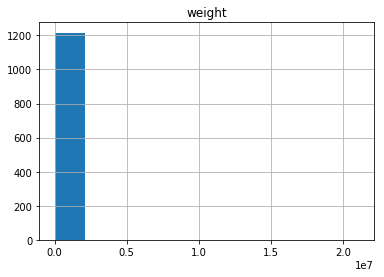

In [10]:
len(dem_info)

1217

In [11]:
len(weight)

1217

In [12]:
for i in l:
    

SyntaxError: unexpected EOF while parsing (<ipython-input-12-b882057075b2>, line 2)

In [ ]:

a

In [ ]:
a[27]

In [ ]:
l

In [ ]:
bytes_read

In [ ]:
import codecs
f = codecs.open("310816_dem.txt", encoding='utf-8')
for line in f:
    
    print( line[1])

In [ ]:
type(bytes_read)